# KNN and Naive Bayes with Scikit-learn

## Load the iris dataset (scaled)

In [10]:
import pandas as pd

iris = pd.read_csv('../../datasets/iris_scaled.csv')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa


## Split the data

In [11]:
from sklearn.model_selection import train_test_split

X = iris.drop('Species', axis=1)
y = iris['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

## K-Nearest Neighbors

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred

array(['virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype=object)

### Evaluate the model

In [17]:
from sklearn.metrics import classification_report, accuracy_score

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.71      0.83      0.77         6
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.87      0.88      0.88        30
weighted avg       0.91      0.90      0.90        30


### Infer the best value for k using cross-validation

In [18]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 31))
k_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
k_scores

[0.9333333333333333,
 0.925,
 0.9416666666666667,
 0.9416666666666667,
 0.9583333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9583333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9666666666666666,
 0.9583333333333334,
 0.9583333333333334,
 0.9583333333333333,
 0.9499999999999998,
 0.95,
 0.9333333333333333,
 0.9333333333333333,
 0.925,
 0.925,
 0.9083333333333334,
 0.9166666666666667,
 0.9,
 0.9,
 0.9]

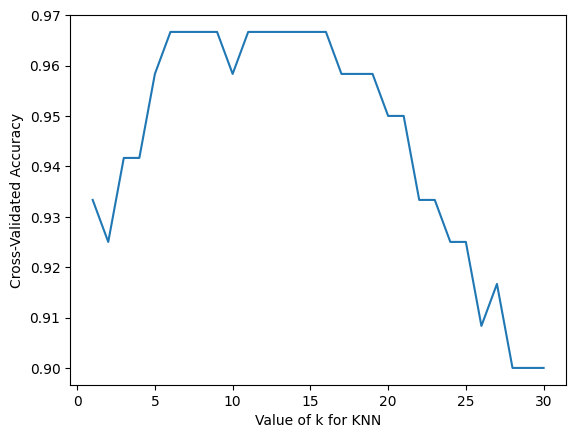

In [19]:
import matplotlib.pyplot as plt

plt.plot(k_values, k_scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Knn with k=15

In [31]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

## Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'versicolor', 'virginica', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'setosa'], dtype='<U10')

In [29]:
print(accuracy_score(y_test, y_pred))

0.9666666666666667


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.86      1.00      0.92         6
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30
